In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as colors
from hankel import SymmetricFourierTransform

from scipy.special import k0,gamma

In [2]:
hgrid = np.logspace(-4,0,50)
Ngrid = np.arange(50,1050,50)

In [4]:
def imshow_plots(res,errs):
    plt.imshow(np.abs(res.T),origin="lower",aspect="auto",cmap='viridis',extent=[np.log10(hgrid[0]),np.log10(hgrid[-1]),Ngrid[0],Ngrid[-1]],
               norm = colors.LogNorm())

    
    plt.xlabel(r"$\log_{10} h$")
    plt.ylabel(r"$N$")
    plt.colorbar()
    plt.contour(np.abs(res.T), [1e-5,1e-3,1e-2],
             origin='lower',
             linewidths=2,
             extent=[np.log10(hgrid[0]),np.log10(hgrid[-1]),Ngrid[0],Ngrid[-1]],aspect="auto")
    #plt.xscale('log')
    plt.show()
    plt.imshow(np.abs(errs.T),origin="lower",aspect="auto",cmap='viridis',extent=[hgrid[0],hgrid[-1],Ngrid[0],Ngrid[-1]],
               norm = colors.LogNorm())
    plt.xscale('log')
    plt.xlabel(r"$h$")
    plt.ylabel(r"$N$")
    plt.colorbar()
    plt.show()
    
def analyse(f,anl,k,ndim=2):
    res = np.zeros((len(hgrid),len(Ngrid)))
    errs = np.zeros((len(hgrid),len(Ngrid)))
    for ih,h in enumerate(hgrid):
        for iN, N in enumerate(Ngrid):
            ht = SymmetricFourierTransform(ndim=ndim, N=N, h=h)
            ans, errs[ih,iN] = ht.transform(f,k)
            res[ih,iN] = ans/anl -1
            errs /= anl
    return res,errs

/home/steven/anaconda2/lib/python2.7/site-packages/hankel.py:56: RuntimeWarning: overflow encountered in sinh
  a = (np.pi * t * np.cosh(t) + np.sinh(np.pi * np.sinh(t))) / (1.0 + np.cosh(np.pi * np.sinh(t)))
/home/steven/anaconda2/lib/python2.7/site-packages/hankel.py:56: RuntimeWarning: overflow encountered in cosh
  a = (np.pi * t * np.cosh(t) + np.sinh(np.pi * np.sinh(t))) / (1.0 + np.cosh(np.pi * np.sinh(t)))
/home/steven/anaconda2/lib/python2.7/site-packages/hankel.py:56: RuntimeWarning: invalid value encountered in divide
  a = (np.pi * t * np.cosh(t) + np.sinh(np.pi * np.sinh(t))) / (1.0 + np.cosh(np.pi * np.sinh(t)))
/home/steven/anaconda2/lib/python2.7/site-packages/hankel.py:56: RuntimeWarning: overflow encountered in multiply
  a = (np.pi * t * np.cosh(t) + np.sinh(np.pi * np.sinh(t))) / (1.0 + np.cosh(np.pi * np.sinh(t)))
/home/steven/anaconda2/lib/python2.7/site-packages/hankel.py:52: RuntimeWarning: overflow encountered in sinh
  y = np.sinh(t)
/home/steven/anaconda2/lib

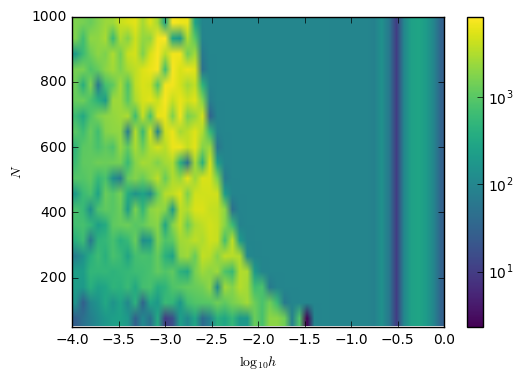

/home/steven/anaconda2/lib/python2.7/site-packages/matplotlib/colors.py:1039: RuntimeWarning: overflow encountered in double_scalars
  return vmin * ma.power((vmax / vmin), val)
/home/steven/anaconda2/lib/python2.7/site-packages/matplotlib/image.py:375: UserWarning: Images are not supported on non-linear axes.
  warnings.warn("Images are not supported on non-linear axes.")


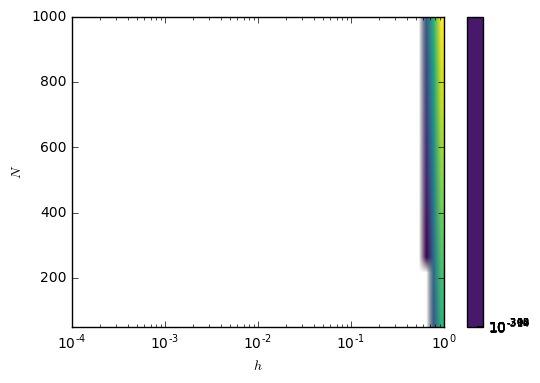

In [6]:
s = -2.
ndim = 4.
k = 0.01

f = lambda x : x**s

nu = ndim/2. - 1
s += nu
if nu-s <= 0 and (nu-s)%2==0:
    raise Exception("Can't have a negative integer for gamma")

anl = (2*np.pi)**(ndim/2.) * 2**(s+1) * gamma(0.5*(2+nu+s))/k**(s+2)/gamma(0.5*(nu-s))/ k**nu

res,errs = analyse(f,anl,k,ndim)
imshow_plots(res,errs)

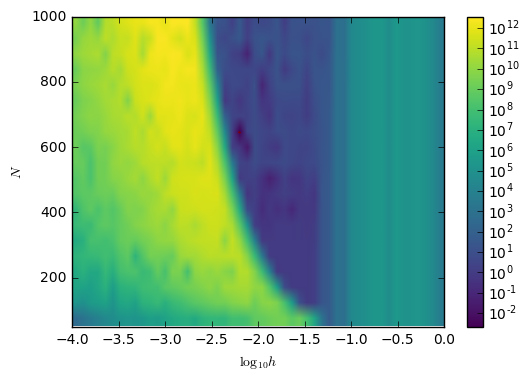

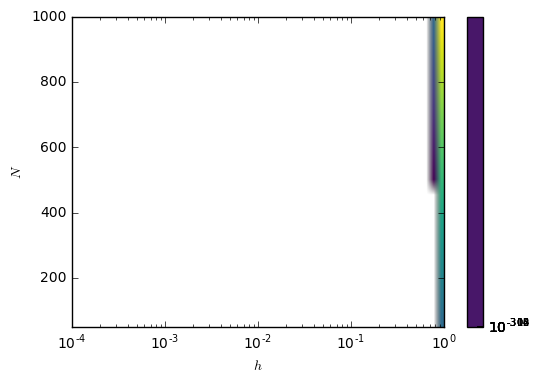

In [7]:
s = -2.
ndim = 6.
k = 0.01

f = lambda x : x**s

nu = ndim/2. - 1
s += nu
if nu-s <= 0 and (nu-s)%2==0:
    raise Exception("Can't have a negative integer for gamma")

anl = (2*np.pi)**(ndim/2.) * 2**(s+1) * gamma(0.5*(2+nu+s))/k**(s+2)/gamma(0.5*(nu-s))/ k**nu

res,errs = analyse(f,anl,k,ndim)
imshow_plots(res,errs)

## Roundtrip

In [10]:
from scipy.interpolate import InterpolatedUnivariateSpline as spline


In [94]:
hgrid = np.logspace(-3,0,40)
Ngrid = np.arange(50,2050,50)
r = np.array([0.1,1,10])

In [74]:
def do_roundtrip_broken_pl(s,t,x0,ndim,N,h,r):
    f = lambda x : x**s/(x**t + x0)
    ht = SymmetricFourierTransform(ndim=ndim,N=N,h=h)

    k = np.logspace(np.log10(ht.x.min()/r.max()/10.0),np.log10(10*ht.x.max()/r.min()),1000)
    resk = ht.transform(f,k,False)
    spl = spline(k,resk)
    res = ht.transform(spl,r,False,inverse=True)

    #print "Analytic: ", f(r), ", Numerical: ", res
    return f(r), res, k, resk,spl

In [79]:
def grid_roundtrip(s,t,x0,ndim,r):
    res = np.zeros((len(hgrid),len(Ngrid),len(r)))
    for ih,h in enumerate(hgrid):
        for iN,N in enumerate(Ngrid):
            f,res[ih,iN],k,resk,spl= do_roundtrip_broken_pl(s,t,x0,ndim,N,h,r)
            res[ih,iN] /= f
            res[ih,iN] -= 1
            
    return res


In [95]:
resgrid_s0_t1_x01_n2 = grid_roundtrip(0,1,1,2,r)

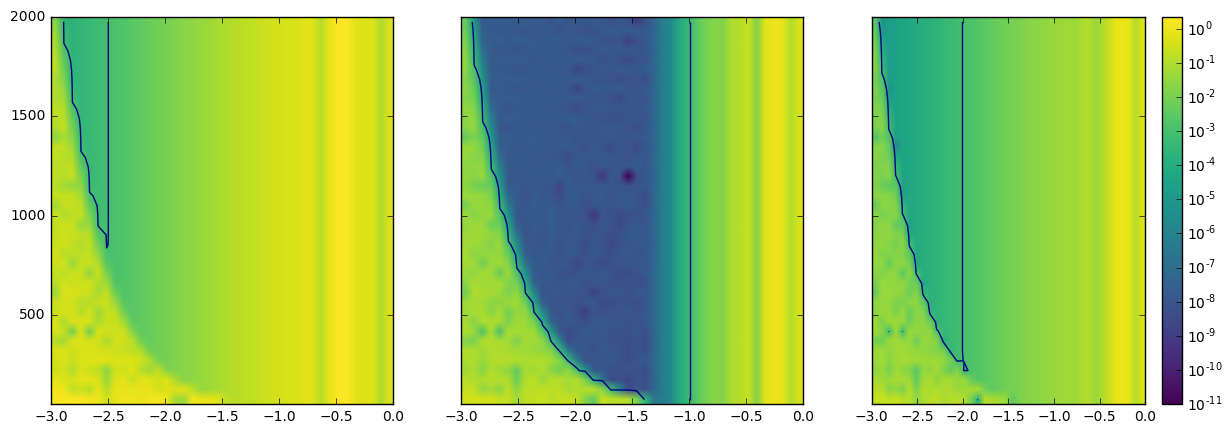

In [96]:
fig,ax = plt.subplots(1,3,sharex=True,sharey=True,figsize=(15,5))
Z = np.abs(resgrid_s0_t1_x01_n2)
ax[0].imshow(Z[:,:,0].T, origin="lower",aspect="auto",cmap='viridis',extent=[np.log10(hgrid[0]),np.log10(hgrid[-1]),Ngrid[0],Ngrid[-1]],
             norm = colors.LogNorm(vmin=Z.min(),vmax=Z.max()))
ax[0].contour(Z[:,:,0].T, levels=[1e-3],origin="lower",aspect="auto",extent=[np.log10(hgrid[0]),np.log10(hgrid[-1]),Ngrid[0],Ngrid[-1]])

ax[1].imshow(Z[:,:,1].T, origin="lower",aspect="auto",cmap='viridis',extent=[np.log10(hgrid[0]),np.log10(hgrid[-1]),Ngrid[0],Ngrid[-1]],
             norm = colors.LogNorm(vmin=Z.min(),vmax=Z.max()))
ax[1].contour(Z[:,:,1].T, levels=[1e-3],origin="lower",aspect="auto",extent=[np.log10(hgrid[0]),np.log10(hgrid[-1]),Ngrid[0],Ngrid[-1]])

im = ax[2].imshow(Z[:,:,2].T, origin="lower",aspect="auto",cmap='viridis',extent=[np.log10(hgrid[0]),np.log10(hgrid[-1]),Ngrid[0],Ngrid[-1]],
             norm = colors.LogNorm(vmin=Z.min(),vmax=Z.max()))
ax[2].contour(Z[:,:,2].T, levels=[1e-3],origin="lower",aspect="auto",extent=[np.log10(hgrid[0]),np.log10(hgrid[-1]),Ngrid[0],Ngrid[-1]])

fig.colorbar(im,ax=ax[2])

In [97]:
        trials = [[0, 1, 1, 2, 1100, 10**-2.5, r],
                  [0, 2, 1, 2, 50, 0.05, r],
                  [0, 3, 1, 2, 50, 0.05, r],
                  [1, 1, 1, 2, 50, 0.05, r],
                  [1, 2, 1, 2, 300, 0.01, r],
                  [1, 3, 1, 2, 1200, 0.0008, r],
                  [2, 1, 1, 2, 50, 0.05, r],
                  [2, 2, 1, 2, 50, 0.05, r],
                  [2, 3, 1, 2, 50, 0.05, r],
                  [3, 1, 1, 2, 50, 0.05, r],
                  [3, 2, 1, 2, 50, 0.05, r],
                  [3, 3, 1, 2, 50, 0.05, r],
#
                  [0, 1, 10, 2, 50, 0.05, r],
                  [0, 2, 10, 2, 50, 0.05, r],
                  [0, 3, 10, 2, 50, 0.05, r],
                  [1, 1, 10, 2, 50, 0.05, r],
                  [1, 2, 10, 2, 50, 0.05, r],
                  [1, 3, 10, 2, 50, 0.05, r],
                  [2, 1, 10, 2, 50, 0.05, r],
                  [2, 2, 10, 2, 50, 0.05, r],
                  [2, 3, 10, 2, 50, 0.05, r],
                  [3, 1, 10, 2, 50, 0.05, r],
                  [3, 2, 10, 2, 50, 0.05, r],
                  [3, 3, 10, 2, 50, 0.05, r],
#
                  [0, 1, 1, 3, 50, 0.05, r],
                  [0, 2, 1, 3, 50, 0.05, r],
                  [0, 3, 1, 3, 50, 0.05, r],
                  [1, 1, 1, 3, 50, 0.05, r],
                  [1, 2, 1, 3, 50, 0.05, r],
                  [1, 3, 1, 3, 50, 0.05, r],
                  [2, 1, 1, 3, 50, 0.05, r],
                  [2, 2, 1, 3, 50, 0.05, r],
                  [2, 3, 1, 3, 50, 0.05, r],
                  [3, 1, 1, 3, 50, 0.05, r],
                  [3, 2, 1, 3, 50, 0.05, r],
                  [3, 3, 1, 3, 50, 0.05, r],
                  #
                  [0, 1, 10, 3, 50, 0.05, r],
                  [0, 2, 10, 3, 50, 0.05, r],
                  [0, 3, 10, 3, 50, 0.05, r],
                  [1, 1, 10, 3, 50, 0.05, r],
                  [1, 2, 10, 3, 50, 0.05, r],
                  [1, 3, 10, 3, 50, 0.05, r],
                  [2, 1, 10, 3, 50, 0.05, r],
                  [2, 2, 10, 3, 50, 0.05, r],
                  [2, 3, 10, 3, 50, 0.05, r],
                  [3, 1, 10, 3, 50, 0.05, r],
                  [3, 2, 10, 3, 50, 0.05, r],
                  [3, 3, 10, 3, 50, 0.05, r]]

In [ ]:
resgrid = [0]*len(trials)
for i,(s,t,x0,ndim,_,_,_) in enumerate(trials):
    resgrid[i] = grid_roundtrip(s,t,x0,ndim,r)

In [ ]:
def plot_single(res):
    fig,ax = plt.subplots(1,3,sharex=True,sharey=True,figsize=(15,5))
    Z = np.abs(res)
    ax[0].imshow(Z[:,:,0].T, origin="lower",aspect="auto",cmap='viridis',extent=[np.log10(hgrid[0]),np.log10(hgrid[-1]),Ngrid[0],Ngrid[-1]],
                 norm = colors.LogNorm(vmin=Z.min(),vmax=Z.max()))
    ax[0].contour(Z[:,:,0].T, levels=[1e-3],origin="lower",aspect="auto",extent=[np.log10(hgrid[0]),np.log10(hgrid[-1]),Ngrid[0],Ngrid[-1]])

    ax[1].imshow(Z[:,:,1].T, origin="lower",aspect="auto",cmap='viridis',extent=[np.log10(hgrid[0]),np.log10(hgrid[-1]),Ngrid[0],Ngrid[-1]],
                 norm = colors.LogNorm(vmin=Z.min(),vmax=Z.max()))
    ax[1].contour(Z[:,:,1].T, levels=[1e-3],origin="lower",aspect="auto",extent=[np.log10(hgrid[0]),np.log10(hgrid[-1]),Ngrid[0],Ngrid[-1]])

    im = ax[2].imshow(Z[:,:,2].T, origin="lower",aspect="auto",cmap='viridis',extent=[np.log10(hgrid[0]),np.log10(hgrid[-1]),Ngrid[0],Ngrid[-1]],
                 norm = colors.LogNorm(vmin=Z.min(),vmax=Z.max()))
    ax[2].contour(Z[:,:,2].T, levels=[1e-3],origin="lower",aspect="auto",extent=[np.log10(hgrid[0]),np.log10(hgrid[-1]),Ngrid[0],Ngrid[-1]])

    fig.colorbar(im,ax=ax[2])
    return fig

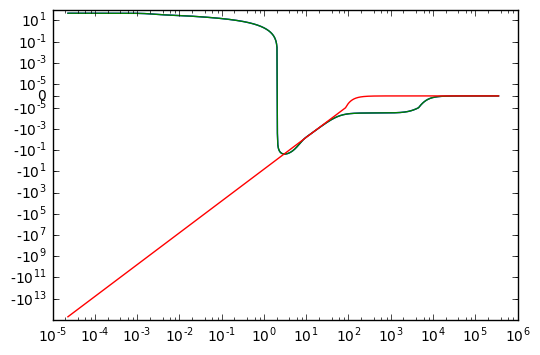

In [63]:
plt.plot(k,resk)
plt.plot(k,splk(k))
plt.plot(k,-2*np.pi/k**3)
plt.xscale('log')
plt.yscale('symlog',linthreshy=1e-5)

In [48]:
ht = SymmetricFourierTransform(ndim=2,N=600,h=0.005)

In [50]:
thisres = ht.transform(lambda x : x**-3.,k,False)

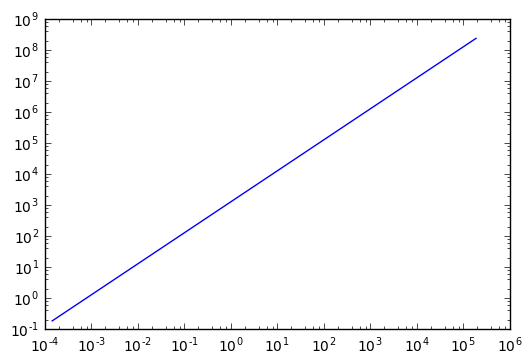

In [51]:
plt.plot(k,thisres)
plt.xscale('log')
plt.yscale('log')